# PROJETO 2 - Análise de Condições Ocupacionais e Fatores Associados ao Trabalho Remoto

## **Introdução**

O trabalho remoto tem ganhado destaque nos últimos anos, especialmente com os avanços tecnológicos e mudanças no mercado de trabalho. Este projeto busca compreender como as condições ocupacionais e fatores associados, como nível de instrução, rendimento mensal e tipo de ocupação, influenciam a possibilidade de trabalho remoto no Brasil.

---

## **Objetivos**

- Identificar os fatores mais relevantes associados ao trabalho remoto.
- Construir modelos preditivos para estimar a probabilidade de trabalho remoto com base em condições ocupacionais.


---

## **Metodologia**

### **1. Fonte de Dados**
Os dados utilizados foram extraídos da Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD), especificamente do **primeiro trimestre de 2023**.

### **2. Pré-Processamento**

## Variável Principal (Target)

A variável principal utilizada como **target** foi **`trabalho_remoto`**, que foi criada a partir da variável `VD4009` (Posição na ocupação e categoria do emprego no trabalho principal). O mapeamento para "Sim" ou "Não" foi realizado com base na elegibilidade para trabalho remoto, considerando as categorias de ocupação.

- **Sim (Trabalho Remoto):**
  - Empregado no setor privado com carteira assinada.
  - Empregado no setor público com carteira assinada.
  - Conta própria em atividades potencialmente remotas.
  - Militares e servidores estatutários em funções administrativas.
  - Profissionais liberais (diretores, técnicos, etc.).

- **Não (Não Trabalho Remoto):**
  - Trabalhador doméstico.
  - Trabalhador familiar auxiliar.
  - Ocupações manuais ou de difícil adaptação ao remoto.

**Refinamento com Nível de Instrução:** Adicionamos um critério de refinamento usando a variável VD3004, que representa o nível de instrução mais elevado alcançado. Apenas ocupações com nível técnico ou superior foram consideradas adequadas ao trabalho remoto.

**Filtragem Adicional com Ocupações Remotas:** Ocupações específicas, representadas pela coluna VD4011, foram usadas para ajustar ainda mais os critérios.

## Variáveis Explicativas (Features)

As variáveis explicativas selecionadas foram:

| **Código da Variável** | **Nome da Variável**                                                                                     | **Justificativa**                                                                                   |
|-------------------------|---------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| **VD3005**              | Anos de estudo padronizado para o Ensino Fundamental (Sistema de 9 anos)                               | Nível de instrução pode influenciar a possibilidade de trabalho remoto.                             |
| **VD4011**              | Grupamentos ocupacionais do trabalho principal                                                         | Certas ocupações, como cargos administrativos e técnicos, são mais adequadas ao trabalho remoto.    |
| **VD4010**              | Grupamentos de atividade principal do empreendimento do trabalho principal                             | Determinados setores, como tecnologia e finanças, têm maior probabilidade de trabalho remoto.       |
| **VD4014**              | Faixa das horas efetivamente trabalhadas na semana de referência em todos os trabalhos                 | Trabalhadores remotos podem ter horas mais flexíveis.                                               |
| **VD4020**              | Rendimento mensal efetivo de todos os trabalhos                                                       | Trabalhos remotos podem estar associados a rendimentos mais elevados.                               |
| **VD4031**              | Horas habitualmente trabalhadas por semana em todos os trabalhos                                       | Padrões de trabalho remoto podem refletir em horas trabalhadas habitualmente.                       |
| **VD3004**              | Nível de instrução mais elevado alcançado                                                              | Níveis superiores de instrução frequentemente estão associados ao trabalho remoto.                  |

---
- **Seleção de Variáveis**:
  Foram selecionadas 13 variáveis relacionadas às condições ocupacionais, como:
  - **Nível de Instrução (VD3004)**.
  - **Rendimento Mensal Efetivo (VD4020)**.
  - **Faixa de Horas Trabalhadas (VD4014)**.
  - **Grupamentos Ocupacionais (VD4011)**.

- **Criação da Variável Alvo**:
  A variável `trabalho_remoto` foi criada para indicar se a ocupação permite trabalho remoto, com base em:
  - Tipo de ocupação.
  - Nível de instrução.
  - Grupamentos de atividades.

### **3. Modelagem**
- **Modelos Utilizados**:
  - *Análise Gráfica*: Para relacionarmos as variaveis Target e Features

## **Revisão Literária**

### Impactos da pandemia no trabalho remoto

"A pandemia COVID-19 foi o maior impulsionador do trabalho remoto, marcando um aumento global no número de profissionais que realizam suas atividades de casa. Porém, apesar da maior produtividade percebida, a satisfação dos trabalhadores em home office é geralmente menor quando comparada ao trabalho presencial." (Graça, 2021)  
UTL REPOSITORY

### Desigualdade de Renda e Acesso à Tecnologia
Em países em desenvolvimento, o acesso à educação e às tecnologias de comunicação tem potencial para reduzir desigualdades de renda. Tanbir Hossain observa que a conectividade digital em áreas rurais pode contribuir para oportunidades de trabalho e inclusão no mercado para grupos historicamente marginalizados. Este acesso pode nivelar as condições de competitividade, especialmente onde há infraestrutura limitada (Hossain, 2021).

### Aspectos ergonômicos e tecnológicos

"O teletrabalho não é apenas uma questão de localização física, mas também da adoção de novas tecnologias que possibilitam a realização das atividades à distância. Contudo, fatores como a precariedade da estrutura domiciliar podem impactar negativamente o desempenho e a saúde do trabalhador." (Bonnet et al., 2020)  
REVISTAFT

### Flexibilidade e desafios no trabalho remoto

"Trabalhadores consideram a flexibilidade de horários um benefício importante do regime remoto, mas enfrentam desafios como isolamento social, conflitos entre vida profissional e pessoal, e pressão por resultados." (Filardi, Castro e Zanini, 2020)  
REVISTAFT


---

In [9]:
import pandas as pd

# PRIMEIRO TRIMESTRE DE 2023
url1 = 'https://www.dropbox.com/scl/fi/fv6fli3jyuinijotw9v6b/pnad23_1.csv?rlkey=1nq6xfd1fn7guz4nyhvwslp7p&st=qpr7odgu&dl=1'



In [10]:
pnad23_1_all = pd.read_csv(url1, nrows=10)
pnad23_1_all.head(), pnad23_1_all.dtypes

(    Ano  Trimestre  UF  Capital  RM_RIDE        UPA  Estrato  V1008  V1014  \
 0  2023          1  11       11      NaN  110000016  1110011      1     10   
 1  2023          1  11       11      NaN  110000016  1110011      1     10   
 2  2023          1  11       11      NaN  110000016  1110011      2     10   
 3  2023          1  11       11      NaN  110000016  1110011      3     10   
 4  2023          1  11       11      NaN  110000016  1110011      3     10   
 
    V1016  ...    V1028191  V1028192  V1028193  V1028194  V1028195    V1028196  \
 0      2  ...  439.015749       0.0       0.0       0.0       0.0  378.334135   
 1      2  ...  439.015749       0.0       0.0       0.0       0.0  378.334135   
 2      2  ...  202.706446       0.0       0.0       0.0       0.0  184.494208   
 3      2  ...  447.575908       0.0       0.0       0.0       0.0  365.848120   
 4      2  ...  447.575908       0.0       0.0       0.0       0.0  365.848120   
 
    V1028197    V1028198    V1


### Seleção de Variáveis para Análise

Nesta etapa, estamos criando uma lista com as variáveis de interesse para a análise. 

- **VD3005**: Anos de estudo padronizado para o Ensino Fundamental (Sistema de 9 anos) - 1º tri/2012 - atual
- **VD4009**: Posição na ocupação e categoria do emprego no trabalho principal - 1º tri/2012 - atual
- **VD4010**: Grupamentos de atividade principal do empreendimento do trabalho principal - 1º tri/2012 - atual
- **VD4011**: Grupamentos ocupacionais do trabalho principal - 1º tri/2012 - atual
- **VD4014**: Faixa das horas efetivamente trabalhadas na semana de referência em todos os trabalhos - 1º tri/2012 - atual
- **VD4020**: Rendimento mensal efetivo de todos os trabalhos - 1º tri/2012 - atual
- **VD4031**: Horas habitualmente trabalhadas por semana em todos os trabalhos - 1º tri/2012 - atual
- **VD4007**: Posição na ocupação no trabalho principal da semana de referência - 1º tri/2012 - atual
- **VD4008**: Posição na ocupação no trabalho principal com subcategorias - 1º tri/2012 - atual
- **VD3004**: Nível de instrução mais elevado alcançado - 1º tri/2012 - atual
- **VD4016**: Rendimento mensal habitual do trabalho principal - 1º tri/2012 - atual
- **VD4018**: Tipo de remuneração habitualmente recebida em todos os trabalhos - 1º tri/2012 - atual
- **VD4035**: Horas efetivamente trabalhadas na semana de referência em todos os trabalhos - 1º tri/2012 - atual

Em seguida, utilizamos essas variáveis para carregar os dados relevantes do arquivo CSV, criando o DataFrame `df_limpo`.


In [11]:
# Criando uma lista com as variáveis comentários de nome e semestre/periodo
colunas = [
    "VD3005",  # Anos de estudo padronizado para o Ensino Fundamental (Sistema de 9 anos) - 1º tri/2012 - atual
    "VD4009",  # Posição na ocupação e categoria do emprego no trabalho principal - 1º tri/2012 - atual
    "VD4010",  # Grupamentos de atividade principal do empreendimento do trabalho principal - 1º tri/2012 - atual
    "VD4011",  # Grupamentos ocupacionais do trabalho principal - 1º tri/2012 - atual
    "VD4014",  # Faixa das horas efetivamente trabalhadas na semana de referência em todos os trabalhos - 1º tri/2012 - atual
    "VD4020",  # Rendimento mensal efetivo de todos os trabalhos - 1º tri/2012 - atual
    "VD4031",  # Horas habitualmente trabalhadas por semana em todos os trabalhos - 1º tri/2012 - atual
    "VD4007",  # Posição na ocupação no trabalho principal da semana de referência - 1º tri/2012 - atual
    "VD4008",  # Posição na ocupação no trabalho principal com subcategorias - 1º tri/2012 - atual
    "VD3004", # Nível de instrução mais elevado alcançado - 1º tri/2012 - atual
    "VD4016",  # Rendimento mensal habitual do trabalho principal - 1º tri/2012 - atual
    "VD4018",  # Tipo de remuneração habitualmente recebida em todos os trabalhos - 1º tri/2012 - atual
    "VD4035",  # Horas efetivamente trabalhadas na semana de referência em todos os trabalhos - 1º tri/2012 - atual
]
colunas
df_limpo = pd.read_csv(url1, usecols=colunas)
#df_limpo = pnad23_1_all[colunas]
#df_limpo.head()

### Criação de um dicionário de mapeamento

Para identificar se uma ocupação permite trabalho remoto, criamos um dicionário de mapeamento que associa cada código de posição na ocupação (`VD4009`) a uma resposta binária ("Sim" ou "Não"). Abaixo estão os critérios utilizados:

- **Sim (Trabalho Remoto):**
    - Empregado no setor privado com carteira assinada.
    - Empregado no setor público com carteira assinada.
    - Militar e servidor estatutário (podem incluir funções administrativas).
    - Empregador (dependendo da ocupação, pode ser remoto).
    - Conta própria (dependendo da ocupação).

- **Não (Não Trabalho Remoto):**
    - Empregado no setor privado sem carteira assinada.
    - Trabalhador doméstico com carteira assinada.
    - Trabalhador doméstico sem carteira assinada.
    - Empregado no setor público sem carteira assinada.
    - Trabalhador familiar auxiliar.
    - Ocupações mal definidas.

### Implementação do Mapeamento

Utilizamos o dicionário `mapa_trabalho_remoto` para mapear os códigos de posição na ocupação (`VD4009`) para a nova variável `trabalho_remoto` no DataFrame `df_limpo`.




In [12]:
# Criação de um dicionário de mapeamento
mapa_trabalho_remoto = {
    1: "Sim",  # Empregado no setor privado com carteira assinada
    2: "Não",  # Empregado no setor privado sem carteira assinada
    3: "Não",  # Trabalhador doméstico com carteira assinada
    4: "Não",  # Trabalhador doméstico sem carteira assinada
    5: "Sim",  # Empregado no setor público com carteira assinada
    6: "Não",  # Empregado no setor público sem carteira assinada
    7: "Sim",  # Militar e servidor estatutário (podem incluir funções administrativas)
    8: "Sim",  # Empregador (dependendo da ocupação, pode ser remoto)
    9: "Sim",  # Conta própria (dependendo da ocupação)
    10: "Não", # Trabalhador familiar auxiliar
    11: "Não"  # Ocupações mal definidas
}

# Criar a nova variável 'trabalho_remoto'
df_limpo['trabalho_remoto'] = df_limpo['VD4009'].map(mapa_trabalho_remoto)


### Refinar usando o nível de instrução

Nesta etapa, refinamos a variável `trabalho_remoto` utilizando o nível de instrução dos indivíduos. Apenas aqueles com nível de instrução "Superior completo" ou "Técnico completo" são considerados elegíveis para trabalho remoto.


# Refinar usando o nível de instrução
df_limpo['trabalho_remoto'] = df_limpo.apply(
    lambda row: "Sim" if row['trabalho_remoto'] == "Sim" and row['VD3004'] in ["Superior completo", "Técnico completo"]
    else "Não", axis=1
)


# Filtragem adicional

Filtragem adicional no DataFrame `df_limpo` para identificar ocupações que podem ser realizadas remotamente. A lista `ocupacoes_remotas` contém os códigos das ocupações que são elegíveis para trabalho remoto, como Diretores e gerentes, Profissionais das ciências e Trabalhadores administrativos.

A coluna `trabalho_remoto` do DataFrame `df_limpo` é atualizada com o valor "Sim" para as linhas onde o código da ocupação (`VD4011`) está presente na lista `ocupacoes_remotas`. Caso contrário, o valor original da coluna `trabalho_remoto` é mantido.

## Parâmetros
- `df_limpo`: DataFrame que contém os dados a serem filtrados.
- `ocupacoes_remotas`: Lista de códigos de ocupações que são elegíveis para trabalho remoto.

## Retorno
- Atualiza a coluna `trabalho_remoto` do DataFrame `df_limpo` com "Sim" para as ocupações elegíveis para trabalho remoto.

In [13]:

ocupacoes_remotas = [1, 2, 4]  # Ex.: Diretores e gerentes, Profissionais das ciências, Trabalhadores administrativos
df_limpo['trabalho_remoto'] = df_limpo.apply(
    lambda row: "Sim" if row['VD4011'] in ocupacoes_remotas else row['trabalho_remoto'], axis=1
)


### Verificação da Contagem de "Sim" e "Não"

Nesta etapa, verificamos a distribuição da variável `trabalho_remoto` para entender a quantidade de indivíduos que podem ou não trabalhar remotamente. A contagem de valores "Sim" e "Não" nos ajuda a identificar o equilíbrio das classes no dataset.

### Salvamento do DataFrame Modificado

Após a verificação, salvamos o DataFrame modificado em um arquivo CSV para futuras análises e modelagens. Este arquivo contém todas as transformações e variáveis necessárias para a análise do trabalho remoto.


In [14]:
# Verificar a contagem de "Sim" e "Não"
print(df_limpo['trabalho_remoto'].value_counts())

# Salvar o DataFrame modificado
df_limpo.to_csv("dados_com_trabalho_remoto.csv", index=False)

trabalho_remoto
Sim    156347
Não     43759
Name: count, dtype: int64


# Estudos Gráficos

## Rendimento Mensal vs Anos de Estudo

1. Distribuição Geral: O rendimento mensal apresenta uma grande variação dentro de cada grupo de anos de estudo.
2. Rendimento Máximo: Há pontos extremos (outliers) em praticamente todas as categorias de anos de estudo, com valores chegando a mais de 300.000.
3. Tendência Geral: A partir de 11 anos de estudo, observa-se um aumento significativo na média de rendimento mensal.
4. Outliers: Outliers altos são evidentes, especialmente em categorias acima de 12 anos de estudo.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Limpar dados faltantes
df = df_limpo.dropna()

# Criar gráficos
figures = []

# Análise 1: Rendimento mensal vs Anos de estudo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_limpo, x="VD3005", y="VD4020", palette="coolwarm")
plt.title("Rendimento Mensal vs Anos de Estudo", fontsize=16)
plt.xlabel("Anos de Estudo")
plt.ylabel("Rendimento Mensal")
plt.show()


ModuleNotFoundError: No module named 'seaborn'

### Distribuição do Nível de Instrução Mais Elevado Alcançado

#### 1. Predominância do Ensino Superior Incompleto
- **Grupo Maior:** Ensino Superior Incompleto (65.748 pessoas).
- **Interpretação:** Muitas pessoas têm acesso à educação superior, mas encontram dificuldades para concluí-la.
- **Possíveis Fatores:** Custos elevados, necessidade de trabalhar, falta de apoio acadêmico.

#### 2. Baixa Instrução
- **Grupo Menor:** Sem instrução ou ensino fundamental incompleto (6.112 pessoas).
- **Interpretação:** A maioria da população tem pelo menos o fundamental completo.
- **Necessidade:** Investir em políticas de inclusão para alcançar a universalização do ensino.

#### 3. Destaque para o Ensino Fundamental Completo
- **Segundo Maior Grupo:** Ensino Fundamental Completo (43.762 pessoas).
- **Interpretação:** Avanços significativos na educação básica, mas há um gargalo na transição para o ensino médio.

#### 4. Ensino Médio e Pós-Graduação
- **Números Baixos:** Ensino Médio Completo (13.127) e Ensino Superior Completo (11.101).
- **Números Expressivos:** Pós-graduação ou nível avançado (40.586).
- **Interpretação:** Quem conclui o ensino superior tende a buscar mais qualificação.

#### 5. Desafios na Conclusão de Níveis Educacionais
- **Discrepância:** Entre os grupos que iniciam e concluem os níveis médio e superior.
- **Possíveis Fatores:** Socioeconômicos, falta de suporte institucional, desmotivação.

#### Relação com o Mercado de Trabalho
- **Limitações:** Alta proporção de pessoas com ensino superior incompleto pode limitar as oportunidades de emprego.
- **Desafios:** Grupos com menor escolaridade enfrentam maiores desafios para se inserir no mercado formal.


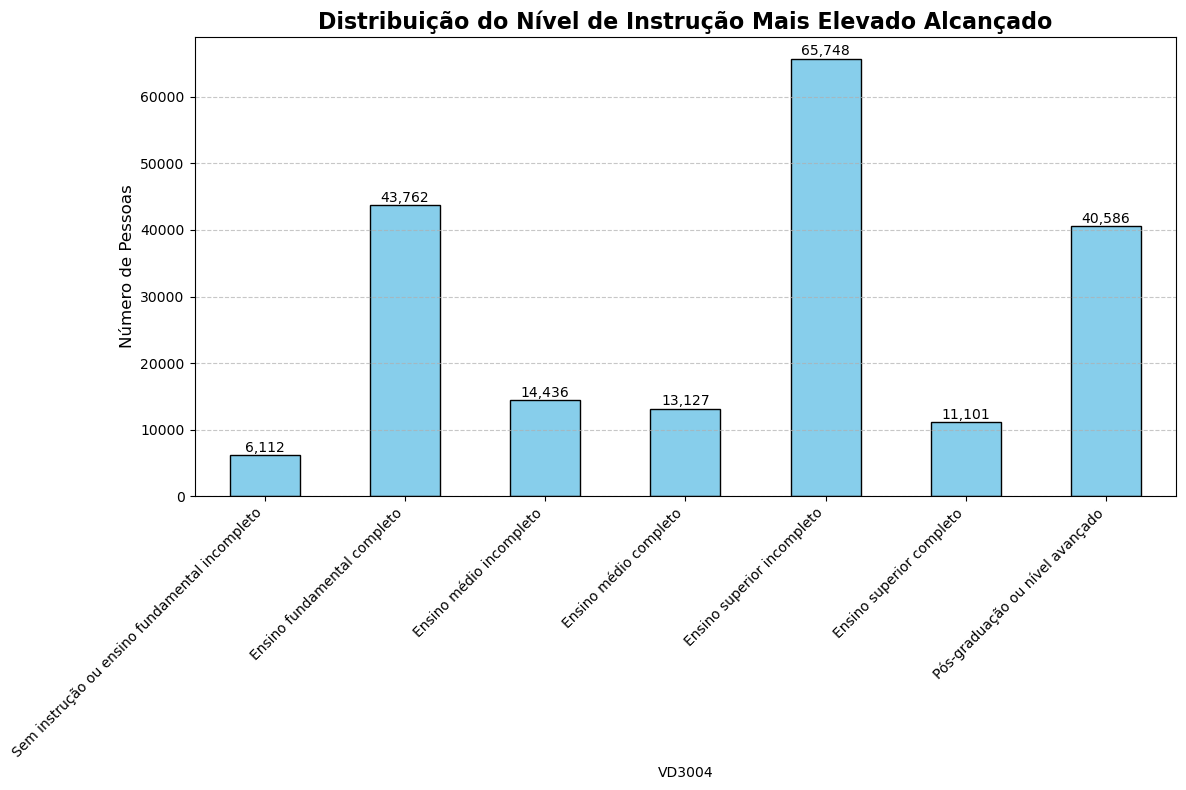

In [ ]:
import matplotlib.pyplot as plt

# Dicionário mapeando os códigos para seus significados
nivel_instrucao_legenda = {
    1: "Sem instrução ou ensino fundamental incompleto",
    2: "Ensino fundamental completo",
    3: "Ensino médio incompleto",
    4: "Ensino médio completo",
    5: "Ensino superior incompleto",
    6: "Ensino superior completo",
    7: "Pós-graduação ou nível avançado"
}

# Plotagem do gráfico
plt.figure(figsize=(12, 8))
df['VD3004'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição do Nível de Instrução Mais Elevado Alcançado', fontsize=16, weight='bold')
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(ticks=range(len(nivel_instrucao_legenda)), labels=[nivel_instrucao_legenda[i] for i in sorted(nivel_instrucao_legenda.keys())], rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os valores acima das barras
for i, count in enumerate(df['VD3004'].value_counts().sort_index()):
    plt.text(i, count + 500, f'{count:,}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()




### Distribuição do rendimento mensal dos indivíduos. 

##### A linha vermelha indica a média, a linha azul representa o valor mínimo e a linha laranja mostra o valor máximo de rendimento mensal.

1. **Distribuição Geral**:
    - A maioria dos indivíduos possui rendimentos mensais concentrados em uma faixa específica, com uma densidade maior em valores mais baixos.
    
2. **Média do Rendimento**:
    - A média do rendimento mensal é de aproximadamente R$ 2.839,37, conforme indicado pela linha vermelha no gráfico. Este valor serve como um ponto de referência para entender a centralidade dos dados.

3. **Valores Extremos**:
    - O rendimento mensal mínimo é de R$ 0,00, enquanto o máximo atinge R$ 300.000,00. Esses valores extremos podem indicar a presença de outliers ou uma grande disparidade na distribuição de renda.

4. **Limitação do Eixo X**:
    - Para uma melhor visualização, o eixo X foi limitado a R$ 20.000,00, permitindo uma análise mais detalhada da densidade dos rendimentos dentro de uma faixa mais comum.


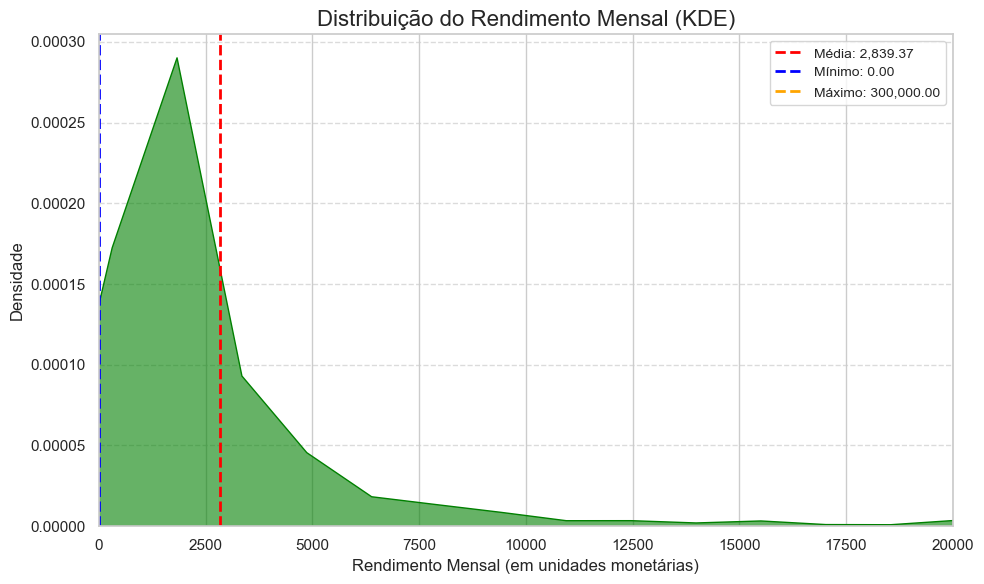

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do estilo
sns.set_theme(style="whitegrid")

# Dados estatísticos
mean_value = df['VD4020'].mean()
min_value = df['VD4020'].min()
max_value = df['VD4020'].max()

# Plotagem KDE com restrição ao eixo X
plt.figure(figsize=(10, 6))
sns.kdeplot(df['VD4020'], fill=True, color="green", alpha=0.6)
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_value:,.2f}')
plt.axvline(min_value, color='blue', linestyle='--', linewidth=2, label=f'Mínimo: {min_value:,.2f}')
plt.axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Máximo: {max_value:,.2f}')

# Limitar o eixo X
plt.xlim(0, 20000)

# Personalização do gráfico
plt.title('Distribuição do Rendimento Mensal (KDE)', fontsize=16)
plt.xlabel('Rendimento Mensal (em unidades monetárias)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





#### Distribuição da Faixa de Horas Trabalhadas por Semana

O gráfico abaixo apresenta a distribuição das faixas de horas trabalhadas por semana entre os indivíduos analisados. 

##### Interpretação do Gráfico

1. **Faixa Predominante: 30-39 horas**
    - **Contagem:** 99.763 indivíduos
    - **Interpretação:** A maioria dos indivíduos trabalha entre 30 e 39 horas por semana. Esta faixa pode representar empregos de meio período ou jornadas reduzidas.

2. **Segunda Faixa Predominante: 15-29 horas**
    - **Contagem:** 43.158 indivíduos
    - **Interpretação:** Um número significativo de indivíduos trabalha entre 15 e 29 horas por semana, possivelmente indicando empregos de meio período ou flexíveis.

3. **Faixa de 0-14 horas**
    - **Contagem:** 13.553 indivíduos
    - **Interpretação:** Esta faixa representa aqueles que trabalham poucas horas por semana, possivelmente devido a empregos temporários, trabalhos informais ou outras atividades de curta duração.

4. **Faixa de 40-44 horas**
    - **Contagem:** 16.759 indivíduos
    - **Interpretação:** Esta faixa representa a jornada de trabalho padrão em muitos setores, indicando empregos de tempo integral.

5. **Faixas de 45-49 horas e 50-59 horas**
    - **Contagem:** 21.639 e 13.553 indivíduos, respectivamente
    - **Interpretação:** Estas faixas indicam jornadas de trabalho mais longas, possivelmente associadas a cargos de maior responsabilidade ou setores que demandam mais horas de trabalho.

6. **Faixa de 60 horas ou mais**
    - **Contagem:** Não especificada no gráfico
    - **Interpretação:** Indivíduos que trabalham 60 horas ou mais por semana representam uma minoria, mas indicam uma carga de trabalho extremamente alta, possivelmente em setores como saúde, tecnologia ou cargos executivos.


- **Flexibilidade e Trabalho Remoto:** A predominância de faixas de 30-39 horas e 15-29 horas pode indicar uma maior flexibilidade no mercado de trabalho, o que pode estar associado ao aumento do trabalho remoto.
- **Carga Horária Elevada:** As faixas de 45-49 horas e 50-59 horas sugerem que uma parcela significativa da população enfrenta jornadas de trabalho extensas, o que pode impactar a qualidade de vida e a saúde dos trabalhadores.
- **Políticas de Trabalho:** Os dados podem ser utilizados para desenvolver políticas que promovam um equilíbrio entre vida profissional e pessoal, especialmente para aqueles em faixas de horas mais elevadas.
.


C:\Users\gabriel\AppData\Local\Temp\ipykernel_19552\4059189509.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VD4014_labels'] = df['VD4014'].map(faixa_horas_labels)


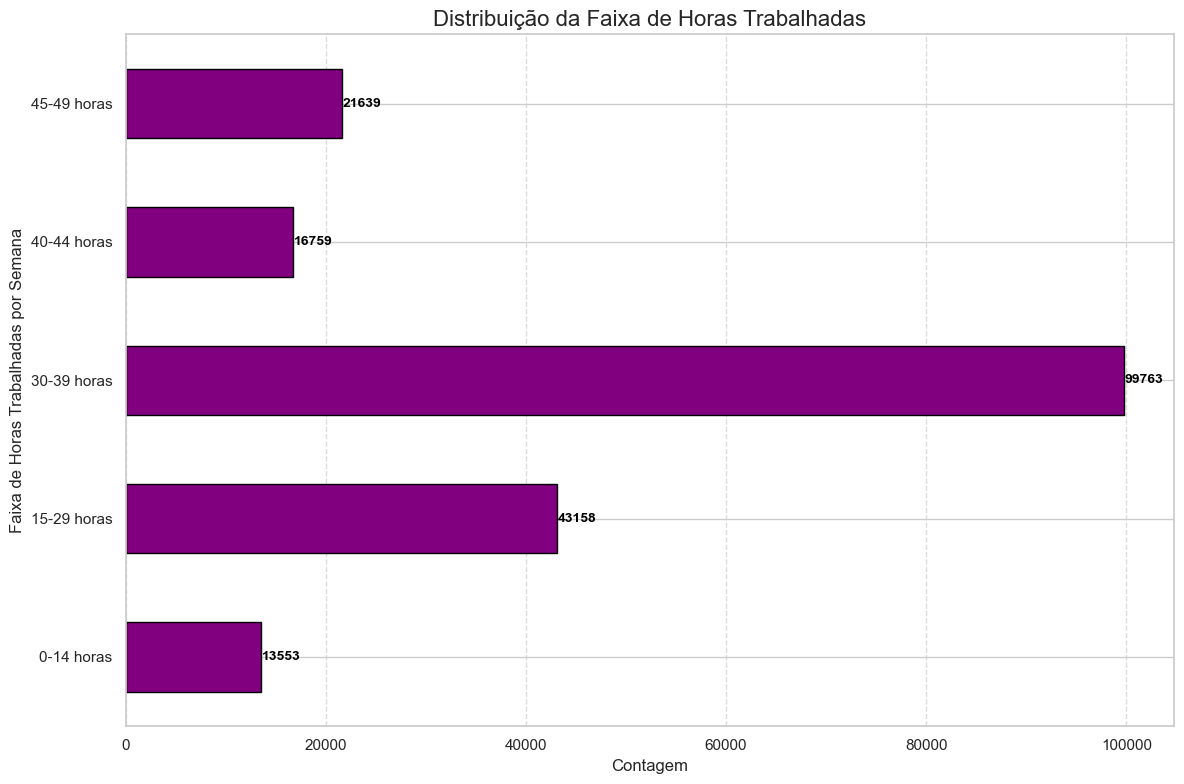

In [ ]:
# Mapeamento de faixas numéricas para rótulos descritivos
faixa_horas_labels = {
    1: "0-14 horas",
    2: "15-29 horas",
    3: "30-39 horas",
    4: "40-44 horas",
    5: "45-49 horas",
    6: "50-59 horas",
    7: "60 horas ou mais"
}

# Substituir os valores no DataFrame por rótulos descritivos
df['VD4014_labels'] = df['VD4014'].map(faixa_horas_labels)

# Contagem das faixas
contagem_horas = df['VD4014_labels'].value_counts().sort_index()

# Gráfico Horizontal com valores nas barras
plt.figure(figsize=(12, 8))
bars = contagem_horas.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Distribuição da Faixa de Horas Trabalhadas', fontsize=16)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('Faixa de Horas Trabalhadas por Semana', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar valores no topo das barras
for i, v in enumerate(contagem_horas):
    plt.text(v + 50, i, str(v), va='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


# Dashboard utilizada para visualização da relação entre os dados

Esta dashboard apresenta um conjunto de gráficos que permitem explorar características quantitativas associadas ao perfil dos trabalhadores remotos. 

C:\Users\dedal\AppData\Local\Temp\ipykernel_3220\2419499854.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x="VD3005", y="VD4020", palette="coolwarm")
C:\Users\dedal\AppData\Local\Temp\ipykernel_3220\2419499854.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VD4014_labels'] = df['VD4014'].map(faixa_horas_labels)


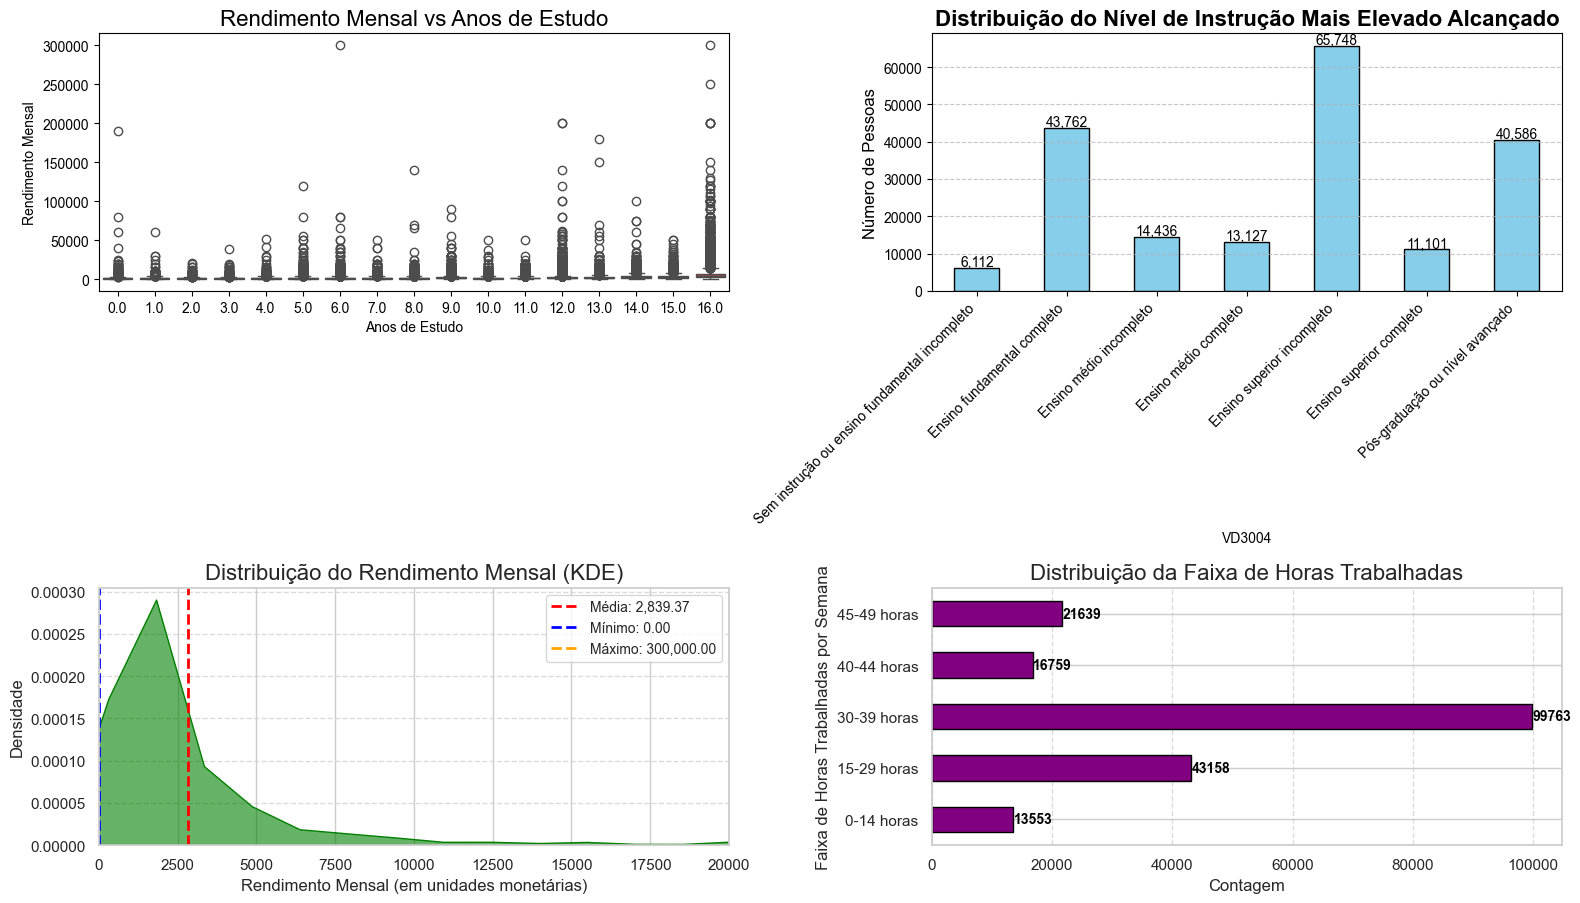

In [18]:
import seaborn as sns

df_limpo["faixa_horas"] = pd.cut(
    df_limpo["VD4014"],
    bins=[0, 14, 29, 39, 44, 49, 59, 100],
    labels=["0-14", "15-29", "30-39", "40-44", "45-49", "50-59", "60+"]
)

df = df_limpo.dropna()
figures = []
# Análise 1: Rendimento mensal vs Anos de estudo

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df_limpo, x="VD3005", y="VD4020", palette="coolwarm")
plt.title("Rendimento Mensal vs Anos de Estudo", fontsize=16)
plt.xlabel("Anos de Estudo")
plt.ylabel("Rendimento Mensal")


# Dicionário mapeando os códigos para seus significados
nivel_instrucao_legenda = {
    1: "Sem instrução ou ensino fundamental incompleto",
    2: "Ensino fundamental completo",
    3: "Ensino médio incompleto",
    4: "Ensino médio completo",
    5: "Ensino superior incompleto",
    6: "Ensino superior completo",
    7: "Pós-graduação ou nível avançado"
}

# Plotagem do gráfico
plt.subplot(2, 2, 2)
df['VD3004'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição do Nível de Instrução Mais Elevado Alcançado', fontsize=16, weight='bold')
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(ticks=range(len(nivel_instrucao_legenda)), labels=[nivel_instrucao_legenda[i] for i in sorted(nivel_instrucao_legenda.keys())], rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os valores acima das barras
for i, count in enumerate(df['VD3004'].value_counts().sort_index()):
    plt.text(i, count + 500, f'{count:,}', ha='center', fontsize=10)

# Configuração do estilo
sns.set_theme(style="whitegrid")

# Dados estatísticos
mean_value = df['VD4020'].mean()
min_value = df['VD4020'].min()
max_value = df['VD4020'].max()

# Plotagem KDE com restrição ao eixo X
plt.subplot(2, 2, 3)
sns.kdeplot(df['VD4020'], fill=True, color="green", alpha=0.6)
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_value:,.2f}')
plt.axvline(min_value, color='blue', linestyle='--', linewidth=2, label=f'Mínimo: {min_value:,.2f}')
plt.axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Máximo: {max_value:,.2f}')

# Limitar o eixo X
plt.xlim(0, 20000)

# Personalização do gráfico
plt.title('Distribuição do Rendimento Mensal (KDE)', fontsize=16)
plt.xlabel('Rendimento Mensal (em unidades monetárias)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)



faixa_horas_labels = {
    1: "0-14 horas",
    2: "15-29 horas",
    3: "30-39 horas",
    4: "40-44 horas",
    5: "45-49 horas",
    6: "50-59 horas",
    7: "60 horas ou mais"
}

# Substituir os valores no DataFrame por rótulos descritivos
df['VD4014_labels'] = df['VD4014'].map(faixa_horas_labels)

# Contagem das faixas
contagem_horas = df['VD4014_labels'].value_counts().sort_index()

# Gráfico Horizontal com valores nas barras
plt.subplot(2, 2, 4)
bars = contagem_horas.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Distribuição da Faixa de Horas Trabalhadas', fontsize=16)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('Faixa de Horas Trabalhadas por Semana', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar valores no topo das barras
for i, v in enumerate(contagem_horas):
    plt.text(v + 50, i, str(v), va='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Interpretação do Dashboard

## Gráfico 1 – Rendimento Mensal vs Anos de Estudo
- Observa-se que, apesar de haver uma grande dispersão de rendimentos em todos os níveis de escolaridade, há uma tendência de aumento no rendimento mensal a partir do **11º ano de estudo**.
- Isso indica que níveis mais altos de escolaridade podem estar associados a ocupações de maior rendimento — e potencialmente elegíveis para o trabalho remoto.

## Gráfico 2 – Distribuição do Nível de Instrução Mais Elevado Alcançado
- **Grupo Maior:** Ensino Superior Incompleto (65.748 pessoas).
- **Interpretação:** Muitas pessoas têm acesso à educação superior, mas encontram dificuldades para concluí-la.
- **Possíveis Fatores:** Custos elevados, necessidade de trabalhar, falta de apoio acadêmico.
- **Grupo Menor:** Sem instrução ou ensino fundamental incompleto (6.112 pessoas).
- **Necessidade:** Investir em políticas de inclusão para alcançar a universalização do ensino.

## Gráfico 3 – Distribuição do Rendimento Mensal (KDE)
- A densidade dos rendimentos se concentra abaixo de R$ 3.000, com média em **R$ 2.839,37**.
- O valor máximo atinge R$ 300.000, indicando alta desigualdade de renda e a presença de outliers, característicos de um mercado de trabalho desigual e segmentado.

## Gráfico 4 – Faixas de Horas Trabalhadas por Semana
- A faixa predominante é de **30 a 39 horas semanais**, comum em jornadas flexíveis ou parciais.
- Destaque também para as faixas de 15 a 29 horas.
- Essas faixas podem indicar ocupações com maior potencial de adaptação ao modelo remoto, ao contrário das jornadas mais extensas ou muito reduzidas.

```markdown


# Conclusão do Projeto

O presente projeto buscou entender os fatores que influenciam a possibilidade de trabalho remoto no Brasil, utilizando dados da PNAD Contínua de 2023. A partir das análises, identificou-se que:

- **Nível de Instrução**: Indivíduos com ensino técnico ou superior têm maior probabilidade de trabalhar remotamente.
- **Faixa de Rendimento Mensal**: Rendimento mais elevado está associado a ocupações elegíveis para o trabalho remoto.
- **Flexibilidade de Jornada**: Ocupações com jornadas entre 30 e 39 horas se destacam como mais adaptáveis ao modelo remoto.

## Desafios Identificados

- **Baixos Níveis de Escolaridade**: Uma grande parcela da população ainda apresenta baixos níveis de instrução, o que limita o acesso a ocupações remotas.
- **Rendimentos Concentrados Abaixo da Média**: A maioria dos indivíduos possui rendimentos mensais abaixo da média, dificultando a inclusão em modalidades de trabalho mais flexíveis e digitalizadas.

## Recomendações

1. **Investimento em Educação**:
    - Ampliar o acesso à educação técnica e superior.
    - Promover políticas públicas que incentivem a conclusão de níveis educacionais mais elevados.

2. **Infraestrutura Tecnológica**:
    - Expandir a conectividade digital, especialmente em áreas rurais e regiões menos desenvolvidas.
    - Investir em tecnologias que facilitem o trabalho remoto.

3. **Políticas de Inclusão**:
    - Criar programas de capacitação para trabalhadores em ocupações menos qualificadas.
    - Incentivar empresas a adotarem modelos híbridos e remotos, promovendo maior flexibilidade no mercado de trabalho.

Com essas ações, espera-se ampliar a inclusão no mercado remoto, reduzindo desigualdades e promovendo maior acesso a oportunidades de trabalho digitalizado.
